# Scraping Youtube Comments

Anda adalah orang dengan rasa ingin tahu yang sangat tinggi, terutama mengenai isi komentar dari
video-video di Youtube yang berkaitan dengan machine learning dalam bahasa Indonesia. Sehingga
anda melakukan beberapa hal berikut:

In [1]:
%pip install selenium
%pip install pandas
%pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Scraping
[LO1, LO2, LO3 – 15 Points] Melakukan scrapping data komentar Youtube yang berkaitan dengan
machine learning dalam bahasa Indonesia sebanyak minimal 100 komentar dari minimal 5 video
berbeda

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from time import sleep
import pandas as pd

import time
import pandas as pd

urls = [
    "https://www.youtube.com/watch?v=Rk1VmHk_kUo&list=PL2O3HdJI4voHNEv59SdXKRQVRZAFmwN9E",
    "https://www.youtube.com/watch?v=vqgucRK5K1A&list=PL2O3HdJI4voHNEv59SdXKRQVRZAFmwN9E&index=3",
    "https://www.youtube.com/watch?v=4zARMcgc7hA&list=PL2O3HdJI4voHNEv59SdXKRQVRZAFmwN9E&index=8",
    "https://www.youtube.com/watch?v=smNnhEd26Ek&list=PL2O3HdJI4voHNEv59SdXKRQVRZAFmwN9E&index=6",
    "https://www.youtube.com/watch?v=WWbyYFPHDH8&list=PL2O3HdJI4voHNEv59SdXKRQVRZAFmwN9E&index=10"
]

# Initialize the Chrome WebDriver
driver = webdriver.Firefox()
driver.set_page_load_timeout(10)
driver.maximize_window()

all_comments = []

In [4]:
for url in urls:
    # Open video URL
    driver.get(url)
    sleep(5)  # Wait for page to load

    # Scroll to load comments
    for _ in range(50):  # Increase range for more scrolling if needed
        driver.execute_script("window.scrollBy(0,700)")
        sleep(2)

    # Extract comments
    comments_element = driver.find_elements(By.XPATH, '//*[@id="content-text"]')
    comments = [comment.text for comment in comments_element]

    all_comments.extend(comments)
    print(f"{len(comments)} comments collected from {url}")

    # Pause before moving to the next video
    sleep(5)


33 comments collected from https://www.youtube.com/watch?v=Rk1VmHk_kUo&list=PL2O3HdJI4voHNEv59SdXKRQVRZAFmwN9E
64 comments collected from https://www.youtube.com/watch?v=vqgucRK5K1A&list=PL2O3HdJI4voHNEv59SdXKRQVRZAFmwN9E&index=3
52 comments collected from https://www.youtube.com/watch?v=4zARMcgc7hA&list=PL2O3HdJI4voHNEv59SdXKRQVRZAFmwN9E&index=8
17 comments collected from https://www.youtube.com/watch?v=smNnhEd26Ek&list=PL2O3HdJI4voHNEv59SdXKRQVRZAFmwN9E&index=6
21 comments collected from https://www.youtube.com/watch?v=WWbyYFPHDH8&list=PL2O3HdJI4voHNEv59SdXKRQVRZAFmwN9E&index=10


In [ ]:
print(f"Total collected comments: {len(all_comments)}")
all_comments[:5]

Total collected comments: 187


['Terimakasih Pak, materi-materi di channel Indonesia Belajar sangat membantu dalam proses pembelajaran',
 'Terima kasih banyak pak. Saya guru SMP, ingin mengajarkan python untuk anak anak. Materi ini sangat membantu. Salam Indonesia Belajar',
 'Yg ditunggu2 akhirnya datang jg',
 'Ayok Semangat Belajar',
 'Terimakasih Pak, materi2 di channel bapak sangat bermanfaat dan saya sangat menyukai intonasi bicara bapak yg membuat semangat belajar dan ngga bikin ngantuk']

In [ ]:
df = pd.DataFrame({"comment": all_comments})
df.to_csv("YoutubeComments_Raw.csv", index=False)

# Close the driver
driver.close()

## Preprocessing
[LO1, LO2, LO3 – 10 Points] Anda melakukan proses preprocessing seperti cleansing, tokenization,
remove stopword, dan lemmatization untuk data hasil scrapping anda

Preprocessing terhadap data hasil scraping komentar di video youtube penting untuk dilakukan karena data yang didapatkan mengandung banyak sekali kekurangan yang dapat mengganggu proses analisis ke depannya atau dengan kata lain, data yang didapatkan itu 'kotor'. Dengan tanda baca yang tidak konsisten, penggunaan huruf besar dan kecil yang campur aduk, keberadaan digit dan singkatan yang tidak standar, serta adanya stopwords dan spasi berlebih dapat mengaburkan informasi penting yang terkandung dalam komentar dan membuat analisis menjadi lebih sulit. Oleh karena itu, preprocessing perlu dilakukan sebelum lanjut ke tahap berikutnya yang dapat berupa sentiment analysis, text classification, maupun task-task analisa lainnya. Preprocessing yang saya lakukan adalah menghilangkan tanda baca, mengonversi ke huruf kecil, memperbaiki singkatan, menghapus stopwords, menghapus spasi berlebih, serta menerapkan stemming dan tokenisasi, dan lain sebagainya.

In [ ]:
# Di read dari csv karena python saya tidak compatible untuk wordcloud, jadi dari bagian wordcloud sampai ke bawah dibuat di colab
import pandas as pd
df = pd.read_csv("YoutubeComments_Raw.csv")

In [ ]:
%pip install nltk
%pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk


In [ ]:
df

,comment
0,"Terimakasih Pak, materi-materi di channel Indo..."
1,"Terima kasih banyak pak. Saya guru SMP, ingin ..."
2,Yg ditunggu2 akhirnya datang jg
3,Ayok Semangat Belajar
4,"Terimakasih Pak, materi2 di channel bapak sang..."
...,...
182,Haloo.. saya mencoba label encoding untuk tipe...
183,"Halo Mbah Budi, sya mw tanya, perbedaan sbener..."
184,"Mbah mau tanya, jika OneHot akan dijadikan dep..."
185,"Mba boedy izin tanya mbah, klo tingkat pendala..."


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# stop_words = set(stopwords.words('indonesian'))
stop_factory = StopWordRemoverFactory()
stop_words = set(stop_factory.get_stop_words())
factory = StemmerFactory()
stemmer = factory.create_stemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URL
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'@\w+|\#', '', text) # remove tag
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    text = re.sub(r'[!"#$%&\'()*+,\-./:;<=>?@\[\\\]^_`{|}~]', ' ', text)  # Remove punctuation
    text = text.replace(',', '')
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
    text = text.strip()
    text = ' '.join(text.split())

    return text


def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

def stemming_text(tokens):
    return [stemmer.stem(word) for word in tokens]


In [ ]:
abbreviation_dict = {
    "tdk": "tidak",
    "gk": "tidak",
    "yg": "yang",
    "aja": "saja",
    "trs": "terus",
    "dll": "dan lain-lain",
    "sdh": "sudah",
    "udh": "sudah",
    "dgn": "dengan",
    "blm": "belum",
    "jg": "juga",
    "dr": "dari",
    "krn": "karena",
    "dlm": "dalam",
    "skrg": "sekarang",
    "utk": "untuk",
    "dpt": "dapat",
    "bgt": "banget",
    "lg": "lagi"
}

def remove_abbreviations(text, abbreviation_dict):
    # Replace abbreviations using the dictionary
    words = text.split()  # Split the text into words
    proc = [abbreviation_dict.get(word, word) for word in words] 
    return ' '.join(proc)


In [ ]:
def preprocess_text(text, stop_words):
    proc = clean_text(text)
    proc = remove_abbreviations(proc, abbreviation_dict)
    proc = word_tokenize(proc)
    proc = stemming_text(proc)
    proc = [i for i in proc if not i in stop_words]
    return proc

In [ ]:
df['preprocessed'] = df['comment'].apply(preprocess_text,args=(stop_words,))
df.head(5)

,comment,preprocessed
0,"Terimakasih Pak, materi-materi di channel Indo...","[terimakasih, pak, materi, materi, channel, in..."
1,"Terima kasih banyak pak. Saya guru SMP, ingin ...","[terima, kasih, banyak, pak, guru, smp, ajar, ..."
2,Yg ditunggu2 akhirnya datang jg,"[tunggu, akhir, datang]"
3,Ayok Semangat Belajar,"[ayok, semangat, ajar]"
4,"Terimakasih Pak, materi2 di channel bapak sang...","[terimakasih, pak, materi, channel, bapak, san..."


## Word Cloud
[LO1, LO2, LO3, LO4 – 10 Points] Anda melakukan analisa sederhana untuk mengetahui kata apa
yang sering muncul dalam komentar-komentar tersebut, anda memvisualisasikannya dalam bentuk
word cloud.

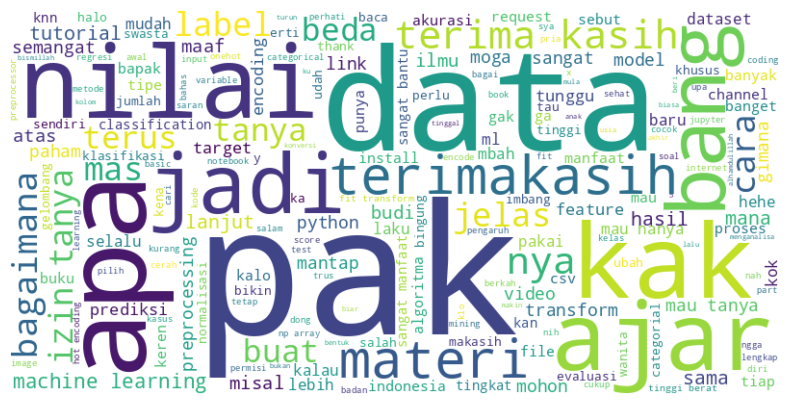

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all words into a single string
all_words = ' '.join([' '.join(words) for words in df['preprocessed']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

Dari Word cloud di atas, kita dapat mengetahui bahwa penonton video pembelajaran machine learning di YouTube umumnya sangat antusias dan mengapresiasi konten yang disajikan, terlihat dari kata-kata seperti "terimakasih," "makasih," dan "mantap." Bisa disimpulkan pula bahwa banyak penonton yang juga mengajukan pertanyaan serta meminta penjelasan lebih lanjut tentang topik tertentu, misalnya "dataset," "model," "classification," dan "preprocessing," yang menjadi penanda topik populer atau bagian yang sering menimbulkan kebingungan. Sapaan seperti "pak" dan "kak" menunjukkan adanya variasi usia atau cara penghormatan dari penonton. Selain itu, ada juga ungkapan dukungan dan kebingungan seperti "semangat," "bingung," dan "maaf," yang menandakan bahwa penonton saling mendukung dalam belajar dan menghadapi tantangan memahami materi machine learning. Tidak hanya itu, ungkapan "semangat" juga bisa menandakan bahwa penonton memberikan dukungan kepada creator video yang baru memulai channelnya sehingga penonton/engagementnya masih kecil.

## Vectorization

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['preprocessed_str'] = df['preprocessed'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_str'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

,accuracy,agama,ajar,akhir,akurasi,algoritma,alhamdulillah,anak,apa,array,...,wisata,wisatawan,with,xgboost,xtrain,yaaa,yah,yak,yet,you
0,0.0,0.0,0.471228,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.354561,0.000000,0.0,0.0,0.0,0.597034,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.585964,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.620824,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.186618,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TF-IDF (Term Frequency-Inverse Document Frequency) adalah salah satu teknik dasar dalam untuk vectorization yang sangat berguna, terutama dalam kasus analisis komentar YouTube. Secara sederhana, TF-IDF mengubah kata-kata dalam teks menjadi angka yang punya bobot tertentu yang merefleksikan seberapa penting kata itu dalam satu dokumen (atau komentar) dibandingkan dengan keseluruhan kumpulan dokumen. Jadi, TF menghitung seberapa sering sebuah kata muncul di suatu komentar, sedangkan IDF mengukur seberapa jarang kata itu muncul di seluruh komentar. Misalnya, kalau kata “pak” atau “terimakasih” muncul di hampir setiap komentar, bobotnya bakal rendah karena kata-kata tersebut tidak membantu kita dalam mengenali isi spesifik dari tiap komentar.

Dalam konteks ini, TF-IDF membantu model untuk lebih fokus ke kata-kata yang punya informasi penting dan unik yang mungkin cuma muncul di komentar tertentu dan mengindikasikan topik yang lebih spesifik. Yang mana hal ini penting terutama jika model nantinya digunakan untuk klasifikasi atau clustering komentar berdasarkan topik. Jadi, dengan TF-IDF, kita juga bisa mengurangi dimensi data, karena hanya kata-kata yang relevan yang dipertahankan. Ini bikin proses komputasi lebih cepat dan efisien, dan juga meningkatkan akurasi model dalam memahami tema atau emosi yang ada dalam komentar.


### Word2Vec

In [26]:
from gensim.models import Word2Vec
import numpy as np

sentences = df['preprocessed']

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# To get the vector representation of a comment by averaging the word vectors
def get_comment_vector(tokens, model):
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Apply to each comment
df['w2v_vector'] = sentences.apply(lambda tokens: get_comment_vector(tokens, word2vec_model))
df.head()

,comment,preprocessed,preprocessed_str,w2v_vector
0,"Terimakasih Pak, materi-materi di channel Indo...","[terimakasih, pak, materi, materi, channel, in...",terimakasih pak materi materi channel indonesi...,"[0.0003618891, 0.0010934523, 0.0028717509, 0.0..."
1,"Terima kasih banyak pak. Saya guru SMP, ingin ...","[terima, kasih, banyak, pak, guru, smp, ajar, ...",terima kasih banyak pak guru smp ajar python a...,"[-0.00010025065, -0.00068952213, 0.0025538544,..."
2,Yg ditunggu2 akhirnya datang jg,"[tunggu, akhir, datang]",tunggu akhir datang,"[0.0042235046, 0.0005577382, -0.0027687233, 0...."
3,Ayok Semangat Belajar,"[ayok, semangat, ajar]",ayok semangat ajar,"[-0.0011064146, -0.0029185116, 0.0020444223, 0..."
4,"Terimakasih Pak, materi2 di channel bapak sang...","[terimakasih, pak, materi, channel, bapak, san...",terimakasih pak materi channel bapak sangat ma...,"[-0.0022134373, 0.0019240055, 0.0007065265, 0...."


Word2Vec adalah teknik yang mengonversi kata menjadi vektor numerik dengan mempertimbangkan makna dan konteksnya. Berbeda dari metode TF-IDF, Word2Vec dapat mengenali kata-kata dengan makna serupa, membuat vektornya lebih dekat satu sama lain. Pendekatan ini sangat bermanfaat untuk analisis komentar YouTube, karena memungkinkan model memahami hubungan semantik dengan membantu modek menangkap makna yang lebih dalam di balik kata-kata dalam komentar. Jadi,kata-kata dengan makna atau konteks yang mirip akan memiliki vektor yang dekat satu sama lain. Dalam Word2Vec, ada dua pendekatan umum: Continuous Bag of Words (CBOW) dan Skip-Gram. CBOW memprediksi kata berdasarkan konteks di sekelilingnya, sementara Skip-Gram memprediksi konteks di sekeliling kata tertentu. 

Saya sendiri menggunakan skip-gram untuk model Word2Vec di atas. Hal ini dikarenakan komentar YouTube biasanya singkat dan tidak selalu konsisten dalam gaya bahasa. Misalnya, di wordcloud ini, kata “izin” mungkin sering muncul dengan konteks tertentu, seperti “tanya” atau “pak,” meskipun jarang langsung berdampingan dengan kata-kata tersebut. Dengan Skip-Gram, model bisa lebih baik mengenali bahwa “izin” punya hubungan dengan “tanya” (misalnya dalam konteks bertanya atau meminta izin), bahkan jika kata-kata ini tidak selalu muncul berdampingan dalam teks.